In [95]:
import re
import emoji
import regex
import pandas as pd
date_string = '26/01/2020'
date_format = '%d/%m/%Y'
date = pd.to_datetime(date_string, format=date_format)
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [96]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]? (AM|PM|am|pm)? -'
    result  = re.match(pattern, s)
    if result:
        return True
    return False

In [97]:
def FindAuthor(s):
    s= s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [98]:
def getDataPointandroid(line):
    splitline = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitline[1:])
    if FindAuthot(message):
        splitMessage = message.split(':')
        author = spliitMessage[0]
        messafe = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [99]:
def getDataPointios(line):
    splitline=line.split(' - ')
    dateTime=splitline[0]
    date,time=dateTime.split(', ')
    message = ' '.join(splitline[1:])
    if FindAuthor(message):
        splitMessage=message.split(':')
        author = splitMessage[0]
        messgae = ' '.join(splitMessage[1:])
    else:
        author = None
    if time[5]==":":
        time=time[:6]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time=time[:6]+time[-3:]
        else:
            time=time[:6]
    return date,time,author,message

In [100]:
def split_count(tesxt):
    
    emoji_list = []
    emojis_list = map(lambda y:y, emoki.UNICODE_EMOJI['en'].keys())
    regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))
    emoji_list = regex_set.findall(text)
    return emoji_list

In [101]:
parsedData=[]
conversationPath= 'C:\\Project\\Whatsapp group chat analysis\\File.txt'
with open(conversationPath,encoding="utf-8")as fp:
    device = ' '
    first = fp.readline()
    print(first)
    if '[' in first:
        device='ios'
    else:
        device="android"
    fp.readline()
    messageBuffer=[]
    date,time,author=None,None,None
    while True:
        line=fp.readline()
        if not line:
            break
        if device=="ios":
            line=line.strip()
            if startsWithDateAndTimeAndroid(line):
                if len(messageBuffer)>0:
                    parsedData.append([date,time,author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message=getDataPointios(line)
                messageBuffer.append(message)
            else:
                line=(line.encode('ascii','ignore')).decode("utf-8")
                if startsWithDateAndTimeAndroid(line):
                    if len(messageBuffer)>0:
                        parsedData.append([date,time,author, ' '.join(messageBuffer)])
                    messageBuffer.clear()
                    date, time, author, message=getDataPointios(line)
                    messageBuffer.append(message)
                else:
                    messageBuffer.append(line)
        else:
            line=line.strip()
            if startsWithDateAndTimeAndroid(line):
                if len(messageBuffer)>0:
                    parsedData.append([date,time,author,' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message=getDataPointios(line)
                messageBuffer.append(message)
            else:
                messageBuffer.append(line)

26/01/2020, 4:19 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.



In [102]:
if device =='android':
    df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.dropna()
    
    URLPATTERN = r'(https?://\S+)'
    df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, coloumns = ["Data",'Time', 'Author', 'Message'])
        df = df.dropna()
        df["Date"] = df['Date'].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"], format = '%Y-%m-%d')
        
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [103]:
df.head(20)

,Date,Time,Author,Message,urlcount
111,2020-01-27,7:31 p,+91 96536 93868,+91 96536 93868: <Media omitted>,0
112,2020-01-27,7:31 p,+91 96536 93868,+91 96536 93868: Give it a try ....,0
113,2020-01-27,7:31 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Alright",0
114,2020-01-27,7:32 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): We can make this a...",0
115,2020-01-27,7:32 p,+91 96536 93868,+91 96536 93868: Sure,0
116,2020-01-27,7:32 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Everyday a new cha...",0
117,2020-01-27,7:43 p,+91 99201 75875,+91 99201 75875: More of logic or algo problems^,0
118,2020-01-27,7:43 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Yeah",0
119,2020-01-27,7:44 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Something or the o...",0
120,2020-01-27,7:59 p,+91 95949 08570,+91 95949 08570: Nice idea 🤟,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 111 to 3979
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3512 non-null   datetime64[ns]
 1   Time      3512 non-null   object        
 2   Author    3512 non-null   object        
 3   Message   3512 non-null   object        
 4   urlcount  3512 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 164.6+ KB


In [105]:
df.Author.unique()

array(['+91 96536 93868', 'Dheeraj Lalwani (TSEC, CS)', '+91 99201 75875',
       '+91 95949 08570', '+91 79778 76844', '+91 90499 38860',
       'Tanay Kamath (TSEC, CS)', 'Saket (TSEC, CS)', '+91 77568 95072',
       'Rohit Pathak (TSEC, CS)', '+91 75078 05454',
       'Darshan Rander (TSEC, IT)', '+91 79774 68083', '+91 70394 60876',
       '+91 96191 55044', '+91 90678 93300', 'Mohit Varma (TSEC, CS)',
       '+91 79770 56210', 'Chirag Sharma (TSEC, CS)',
       'Vivek Iyer (TSEC, Biomed)', 'Tushar Nankani', '+91 81696 22410',
       '+91 89764 07509', '+91 78758 66747', 'Ankit (TSEC, CS)',
       '+91 86556 33169', '+91 76663 28147', '+91 88284 70904',
       '+91 97698 67348', 'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)',
       '+91 91680 38866', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+91 99675 58551', '+91 90822 59476', 'Prithvi Rohira (TSEC,

In [106]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 111 to 3979
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3512 non-null   datetime64[ns]
 1   Time      3512 non-null   object        
 2   Author    3512 non-null   object        
 3   Message   3512 non-null   object        
 4   urlcount  3512 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 164.6+ KB


In [107]:
total_message = df.shape[0]
print(total_message)

3512


In [108]:
media_messages = df[df['Message']=='<Media omitted>'].shape[0]
print(media_messages)

0


In [109]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = sum(df.urlcount)
print(links)

37


In [110]:
link_messages = df[df['urlcount']>0]
deleted_messages = df[(df["Message"] == "You deleted this message")| (df["Message"] == " This message was deleted. ")]
media_messages_df = df[(df['Message'] == '<Media omitted>') | (df['Message'] == 'images omitted') | (df['Message'] == ' video omitted ') | (df['Message'] == ' sticker omitted ')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [111]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3485 entries, 111 to 3979
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3485 non-null   datetime64[ns]
 1   Time      3485 non-null   object        
 2   Author    3485 non-null   object        
 3   Message   3485 non-null   object        
 4   urlcount  3485 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 163.4+ KB


In [112]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['word_count']= messages_df['Message'].apply(lambda s: len(s.split(' ')))
messages_df['MessageCount'] = 1

In [113]:
messages_df.head(10)

,Date,Time,Author,Message,urlcount,Letter_Count,word_count,MessageCount
111,2020-01-27,7:31 p,+91 96536 93868,+91 96536 93868: <Media omitted>,0,32,5,1
112,2020-01-27,7:31 p,+91 96536 93868,+91 96536 93868: Give it a try ....,0,35,8,1
113,2020-01-27,7:31 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Alright",0,35,5,1
114,2020-01-27,7:32 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): We can make this a...",0,52,10,1
115,2020-01-27,7:32 p,+91 96536 93868,+91 96536 93868: Sure,0,21,4,1
116,2020-01-27,7:32 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Everyday a new cha...",0,52,8,1
117,2020-01-27,7:43 p,+91 99201 75875,+91 99201 75875: More of logic or algo problems^,0,48,9,1
118,2020-01-27,7:43 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Yeah",0,32,5,1
119,2020-01-27,7:44 p,"Dheeraj Lalwani (TSEC, CS)","Dheeraj Lalwani (TSEC, CS): Something or the o...",0,98,17,1
120,2020-01-27,7:59 p,+91 95949 08570,+91 95949 08570: Nice idea 🤟,0,28,6,1


In [114]:
frnds = messages_df.Author.unique()
for i in range(len(frnds)):
    # filtering out mesaages of particular user
    req_df = messages_df[messages_df["Author"] == frnds[i]]
    # req_df will contain messages of only one particular user
    print(f'Stats of {frnds[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    # Word_count contains of total words in one message . Sum of all words/ Total Message wil yield words
    words_per_message = (np.sum(req_df['word_count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media consists of media messages
    media = media_messages_df[media_messages_df['Author'] == frnds[i]].shape[0]
    print('Media messages Sent' , media)
    
    #links consists of total links
    links = sum(link_messages[link_messages['Author'] == frnds[i]]["urlcount"])
    print('Links Sent', links)
    print()

Stats of +91 96536 93868 -
Messages Sent 65
Words per message 18.73846153846154
Media messages Sent 0
Links Sent 0

Stats of Dheeraj Lalwani (TSEC, CS) -
Messages Sent 518
Words per message 9.432432432432432
Media messages Sent 0
Links Sent 6

Stats of +91 99201 75875 -
Messages Sent 26
Words per message 15.423076923076923
Media messages Sent 0
Links Sent 0

Stats of +91 95949 08570 -
Messages Sent 96
Words per message 6.895833333333333
Media messages Sent 0
Links Sent 0

Stats of +91 79778 76844 -
Messages Sent 2
Words per message 4.0
Media messages Sent 0
Links Sent 0

Stats of +91 90499 38860 -
Messages Sent 2
Words per message 4.0
Media messages Sent 0
Links Sent 0

Stats of Tanay Kamath (TSEC, CS) -
Messages Sent 688
Words per message 8.611918604651162
Media messages Sent 0
Links Sent 2

Stats of Saket (TSEC, CS) -
Messages Sent 76
Words per message 11.407894736842104
Media messages Sent 0
Links Sent 0

Stats of +91 77568 95072 -
Messages Sent 1
Words per message 25.0
Media messag

Text(0, 0.5, 'number of messages')

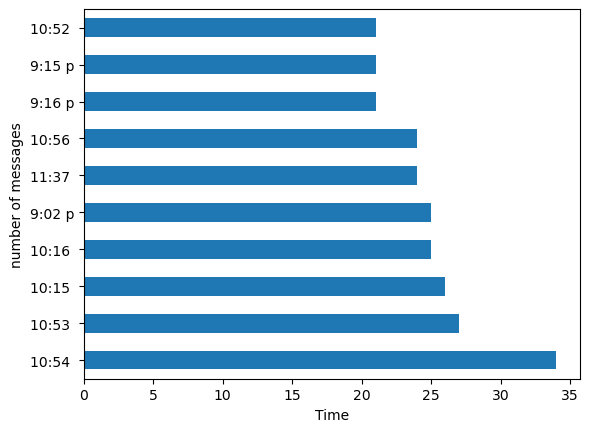

In [115]:
messages_df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Time')
plt.ylabel('number of messages')

There are 198149 words in all the messages.


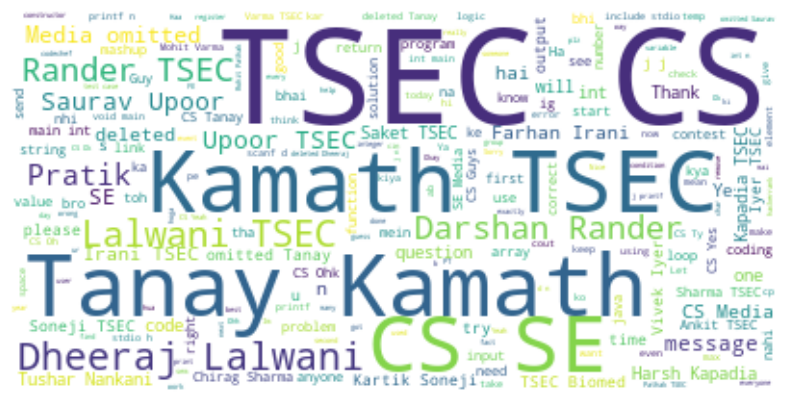

In [116]:
text = " ".join(review for review in messages_df['Message'])
print("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, background_color = 'white'). generate(text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Author name Saket (TSEC, CS)


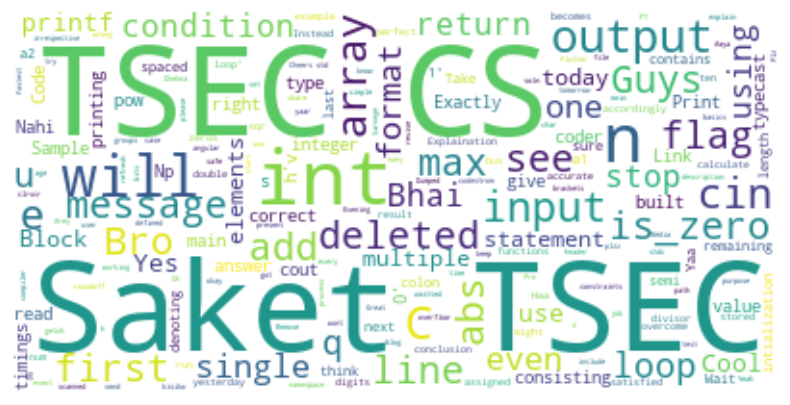

Author name Tanay Kamath (TSEC, CS)


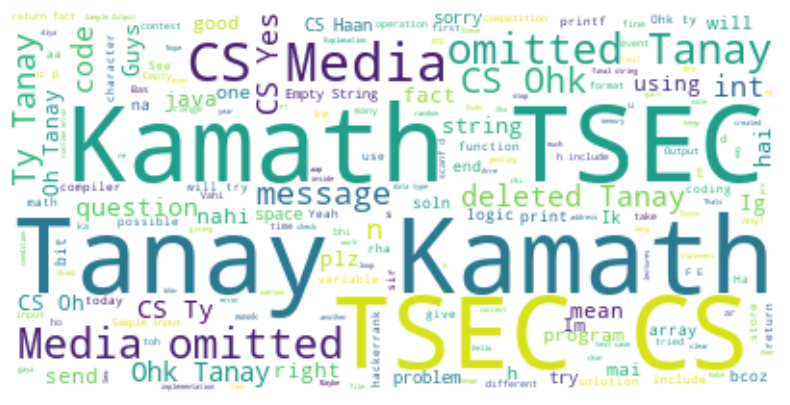

Author name Dheeraj Lalwani (TSEC, CS)


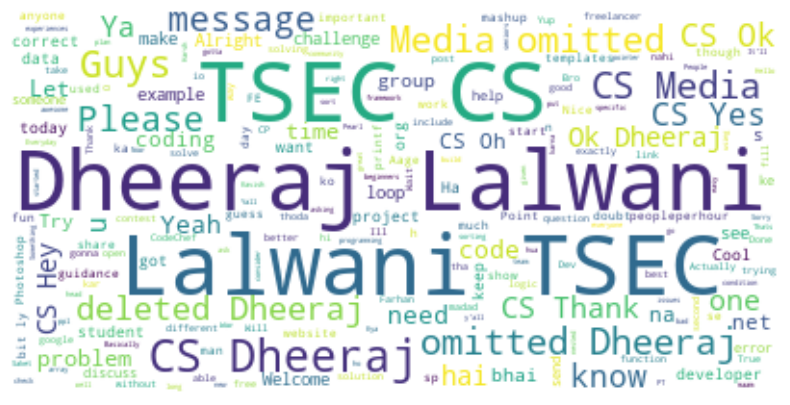

In [117]:
l = ["Saket (TSEC, CS)", "Tanay Kamath (TSEC, CS)", "Dheeraj Lalwani (TSEC, CS)"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #generate a  word cloud image
    print('Author name', l[i])
   # wordcloud = WordCloud(stopwords, background_color = "white").generate(text)
    wordcloud = WordCloud(stopwords=list(stopwords), background_color="white").generate(text)
    #Display the generated image
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()